## Planck's Radiation law:
The spectral energy density black body radiation:
\begin{equation}
 u(\nu)d\nu = \frac{8\pi h}{c^3}\frac{\nu^3 d\nu}{e^{\frac{h\nu}{kT}}-1}
\end{equation}

## Rayleigh-Jeans formula:
The spectral energy density black body radiation:
\begin{equation}
u(\nu)d\nu = \frac{8\pi kT}{c^3}\nu^2 d\nu
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sp

## (a) Plot Planck’s law for Black Body radiation and Rayleigh-Jeans Law superposed on the same graph at $ 𝑇 = 4000 K$ and $𝑇 = 8000K$ . The frequency $(𝜈)$ in the range $ \left[1,15\frac{K_B T}{h} \right] $.

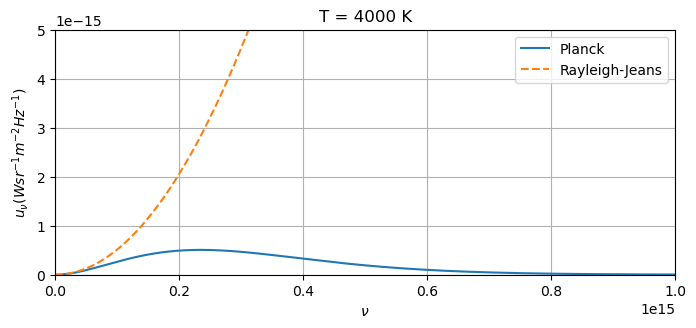

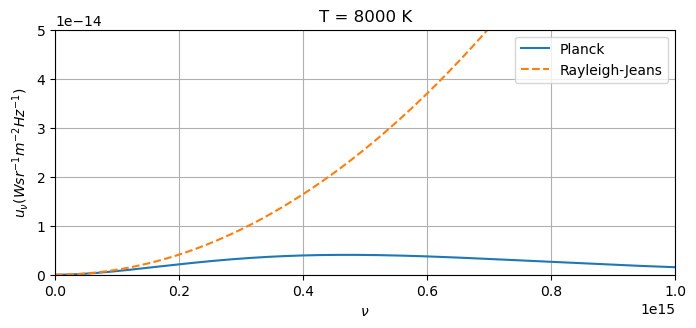

In [117]:

h = 6.626e-34  
c = 3.0e8     
k = 1.38e-23 

T1 = 4000
T2 = 8000
f = np.linspace(1, 15*k*T1/h, 1000)

def planck(f, T):
    return (8*np.pi*h*f**3) / (c**3 * (np.exp(h*f/(k*T)) - 1))

def rj(f, T):
    return (8*np.pi*k*T*f**2) / c**3


plt.figure(figsize=(8, 7))
plt.subplot(2,1,1)
plt.title('T = 4000 K')
plt.plot(f, planck(f,T1), label='Planck')
plt.plot(f, rj(f,T1), '--', label='Rayleigh-Jeans')
plt.xlabel(r'$\nu$')
plt.ylabel(r'$u_\nu(W sr^{-1}m^{-2}Hz^{-1}$)')
plt.legend()
plt.xlim(0,1e15)
plt.ylim(0,0.5e-14)
plt.grid()
plt.show()
plt.figure(figsize=(8, 7))
plt.subplot(2,1,2)
plt.title('T = 8000 K')
plt.plot(f, planck(f,T2), label='Planck')
plt.plot(f, rj(f,T2), '--', label='Rayleigh-Jeans')
plt.xlabel(r'$\nu$')
plt.ylabel(r'$u_\nu(W sr^{-1}m^{-2}Hz^{-1}$)')
plt.legend()
plt.xlim(0,1e15)
plt.ylim(0,0.5e-13)
plt.grid()
plt.show()

## (b) Frequency at which the energy density is maximum and spectrum region of those frequencies. 

In [121]:

max_freq_4000 = f[np.argmax(planck(f, 4000))]
max_freq_8000 = f[np.argmax(planck(f, 8000))]
print("Frequency at which energy density is maximum:")
if max_freq_4000 < 3e14:
    print(f"For T=4000K: {max_freq_4000:.2e} Hz (Infrared region)")
elif max_freq_4000 < 7e14:
    print(f"For T=4000K: {max_freq_4000:.2e} Hz (Visible region)")
else:
    print(f"For T=4000K: {max_freq_4000:.2e} Hz (Ultraviolet region)")
if max_freq_8000 < 3e14:
    print(f"For T=8000K: {max_freq_8000:.2e} Hz (Infrared region)")
elif max_freq_8000 < 7e14:
    print(f"For T=8000K: {max_freq_8000:.2e} Hz (Visible region)")
else:
    print(f"For T=8000K: {max_freq_8000:.2e} Hz (Ultraviolet region)")


Frequency at which energy density is maximum:
For T=4000K: 2.35e+14 Hz (Infrared region)
For T=8000K: 4.70e+14 Hz (Visible region)


## (c) Calculation of  the minimum frequency, $\nu_{min}$ where the difference between the energy densities predicted by these laws are more than $10\% \left(\frac{\Delta U}{U_{planck}} \ge 0.1\right)$ at T = 300K .

In [119]:

n = np.linspace(1, 15*k*300/h, 1000)
delta = np.abs(planck(n, 300) - rj(n, 300)) / planck(n, 300)
min_freq = n[np.argmax(delta >= 0.1)]
print(f"The minimum frequency where the difference >10% at T=300K is {min_freq:.2e} Hz.")

The minimum frequency where the difference >10% at T=300K is 1.22e+12 Hz.


## (d) Evaluation of  the total energy in the visible spectrum $\left( \nu=4 × 10^{14} − 7.5 × 10^{14} Hz\right)$ in the range $𝑇 \in [100,400]$ by direct integration and then plot of the visible energy as a function of temperature.

[3.433871896747856e-84, 1.6238481619196445e-42, 1.2713931987579445e-28, 1.144408837618791e-21] J/m^2


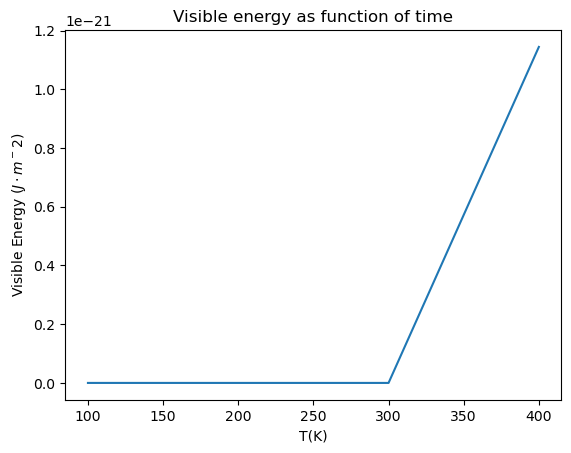

In [126]:

f_min = 4e14  
f_max = 7.5e14  
n = 10  
f = np.linspace(f_min, f_max, n)
T_range = np.arange(100,500,100)
energy = []

def integrand(f):
        h = 6.626e-34 
        c = 3e8  
        k = 1.381e-23 
      
        return (8*np.pi*h*f**3 / (c**3 * (np.exp(h*f/(k*T)) - 1)))

for T in T_range:
    E = np.trapz(integrand(f), f)
    energy.append(E)

print(energy, 'J/m^2')

plt.plot(T_range,energy)
plt.title('Visible energy as function of time')
plt.ylabel(r'Visible Energy ($J\cdot m^-2)$')
plt.xlabel('T(K)')
plt.show()

*N.B.: In the plot of visible energy as a function of temperature, the total energy is divide by the surface area of the blackbody radiator as the Planck's law gives us the energy density per unit frequency per unit surface area. Therefore, the units of the plotted visible energy as a function of temperature will be Joules per square meter $J\cdot m^{-2}$. 